# 1. Install and import libraries

In [5]:
# Install libraries
!pip install pandas numpy matplotlib seaborn scikit-learn

# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [4]:
# Load the data
df = pd.read_csv("/Users/sarahedens/Downloads/House Regression project/02 Data/train.csv")

# 2. Remove categorical columns and standardize the data

In [9]:
# Remove categorical columns
numerical_data = df.select_dtypes(include=[np.number])

# Drop columns that won't be used for clustering
numerical_data = numerical_data.drop(columns=['Id'])

# Handle missing values by filling them with the mean of each column
numerical_data = numerical_data.fillna(numerical_data.mean())

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)


In [10]:
# Display the scaled data to ensure it is standardized correctly
print(scaled_data[:5])

[[ 0.07337496 -0.22937175 -0.20714171  0.65147924 -0.51719981  1.05099379
   0.87866809  0.51141841  0.57542484 -0.28865283 -0.94459061 -0.45930254
  -0.79343379  1.16185159 -0.12024172  0.37033344  1.10781015 -0.24106104
   0.78974052  1.22758538  0.16377912 -0.21145358  0.91220977 -0.95122649
   1.02115667  0.31172464  0.35100032 -0.75217584  0.21650316 -0.3593249
  -0.11633929 -0.27020835 -0.06869175 -0.08768781 -1.5991111   0.13877749
   0.34727322]
 [-0.87256276  0.4519361  -0.09188637 -0.07183611  2.17962776  0.15673371
  -0.42957697 -0.57441047  1.17199212 -0.28865283 -0.64122799  0.46646492
   0.25714043 -0.79516323 -0.12024172 -0.48251191 -0.81996437  3.94880935
   0.78974052 -0.76162067  0.16377912 -0.21145358 -0.31868327  0.60049493
  -0.10448286  0.31172464 -0.06073101  1.62619479 -0.70448325 -0.3593249
  -0.11633929 -0.27020835 -0.06869175 -0.08768781 -0.48911005 -0.61443862
   0.00728832]
 [ 0.07337496 -0.09311018  0.07347998  0.65147924 -0.51719981  0.9847523
   0.830214

# 3. Elbow technique to determine # of clusters

/Users/sarahedens/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

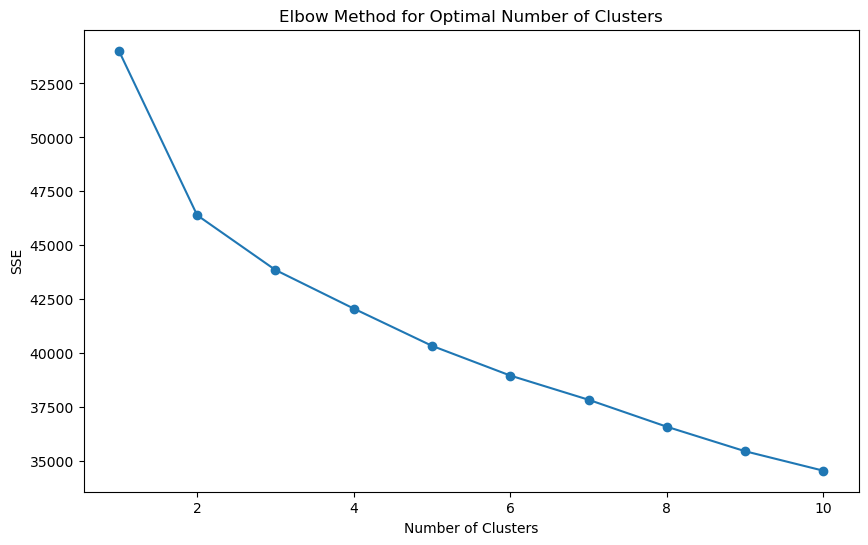

In [11]:
# Use the elbow method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


#### Based on the Elbow Method, it seems like 2 clusters might be the optimal choice since the decrease in SSE slows down significantly at that point

## 4. Run the k-means algorithm with the chosen number of clusters

In [14]:
# Run k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Attach the resulting clusters to the original dataframe
df['Cluster'] = clusters

# Display the data with the new 'Cluster' column
print(df.head())


/Users/sarahedens/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2008   
1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   2007   
2         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   2008   
3         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2006   
4         Lvl    AllPub  ...    NaN   NaN         NaN       0     12   2008   

  SaleType  SaleCondition  SalePrice  Cluster  
0       WD         Normal     20

In [27]:
from sklearn.cluster import KMeans

# Assuming 'df' is your dataframe and you want to cluster based on 'GrLivArea' and 'OverallQual'
selected_features = ['GrLivArea', 'OverallQual']
X = df[selected_features]

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)


/Users/sarahedens/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
from sklearn.cluster import KMeans

# Assuming 'data' is your dataframe and you want to cluster based on certain features
selected_features = ['GrLivArea', 'OverallQual']  # Example features
X = df[selected_features]  # Select the features for clustering

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Specify the number of clusters
clusters = kmeans.fit_predict(X)  # Fit the model and get cluster labels

# Add cluster labels to dataframe
df['Cluster'] = clusters


/Users/sarahedens/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# 5. Visualizations

In [31]:
# Scatter plot of some selected features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='Cluster', df=data, palette='viridis')
plt.title('Clusters based on GrLivArea and SalePrice')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='OverallQual', y='SalePrice', hue='Cluster', df=data, palette='viridis')
plt.title('Clusters based on OverallQual and SalePrice')
plt.show()


NameError: name 'data' is not defined

<Figure size 1000x600 with 0 Axes>

In [33]:
plt.show()

In [36]:
# Select numerical columns from the dataframe
df_numeric = df.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Run k-means algorithm with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = clusters


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [37]:
# Check for missing values in your numerical columns
missing_values = df.select_dtypes(include=[np.number]).isnull().sum()
print(missing_values)

# Impute missing values with mean
df_numeric.fillna(df_numeric.mean(), inplace=True)

# Verify that missing values have been imputed
missing_values_after_imputation = df_numeric.isnull().sum()
print(missing_values_after_imputation)


Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
Cluster            0
dtype: int64
Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea      

In [38]:
# Impute missing values with mean
df_numeric['LotFrontage'].fillna(df_numeric['LotFrontage'].mean(), inplace=True)
df_numeric['MasVnrArea'].fillna(df_numeric['MasVnrArea'].mean(), inplace=True)
df_numeric['GarageYrBlt'].fillna(df_numeric['GarageYrBlt'].mean(), inplace=True)

# Verify that missing values have been imputed
missing_values_after_imputation = df_numeric.isnull().sum()
print(missing_values_after_imputation)


Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
Cluster          0
dtype: int64


In [39]:
# Run k-means algorithm with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = clusters


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [40]:
from sklearn.impute import SimpleImputer

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
df_scaled_imputed = imputer.fit_transform(df_scaled)

# Run k-means algorithm with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df_scaled_imputed)

# Add cluster labels to the dataframe
df['Cluster'] = clusters


/Users/sarahedens/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [41]:
# Run k-means algorithm with 2 clusters and suppress future warning
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled_imputed)


In [42]:
# Display column names
print(df.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 6. Numerical plot

/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


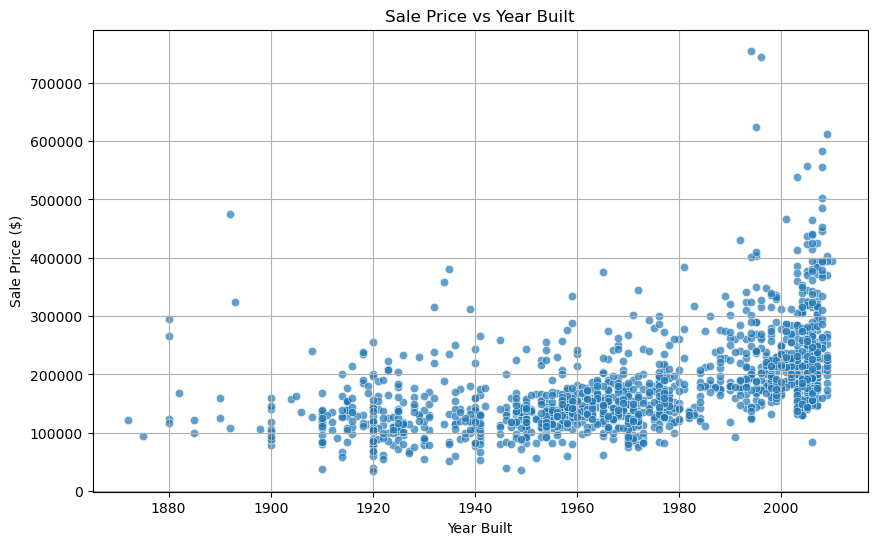

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df, alpha=0.7)
plt.title('Sale Price vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price ($)')
plt.grid(True)
plt.show()


#### Clusters around the year 2000: This clustering pattern may indicate a period of significant construction or renovation activity. Houses built or renovated around this time might share similar characteristics or amenities, which could influence their sale prices. It's also possible that the dataset contains a higher number of recent sales compared to older ones, contributing to the clustering effect around the year 2000.

Cluster 1:
- Number of houses: 797
- Average sale price: $132,276 (mean), $31,554 (standard deviation)
- Sale price range: $34,900 to $260,000
- Sale price percentiles: 
  - 25th percentile: $113,000
  - 50th percentile (median): $133,900
  - 75th percentile: $151,000

Cluster 2:
- Number of houses: 663
- Average sale price: $239,399 (mean), $80,239 (standard deviation)
- Sale price range: $82,500 to $755,000
- Sale price percentiles: 
  - 25th percentile: $186,500
  - 50th percentile (median): $219,500
  - 75th percentile: $271,000


/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

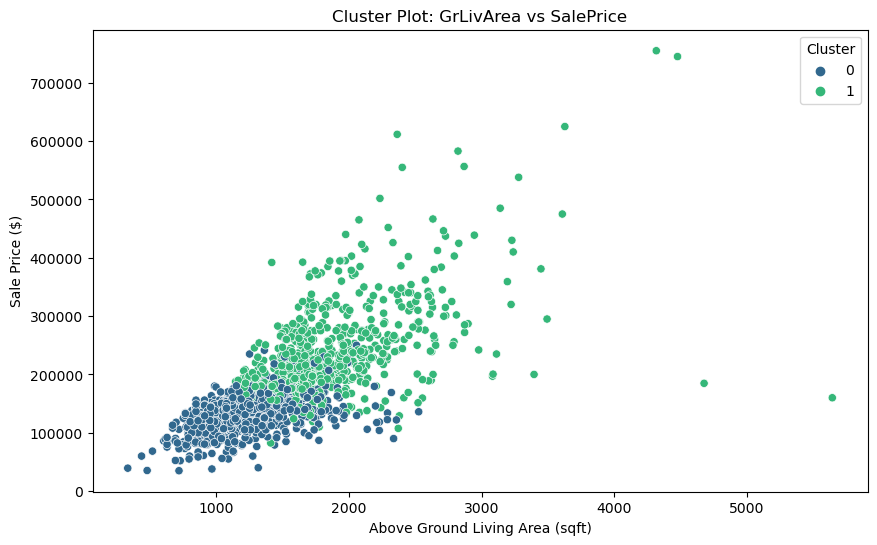

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='Cluster', data=df, palette='viridis')
plt.title('Cluster Plot: GrLivArea vs SalePrice')
plt.xlabel('Above Ground Living Area (sqft)')
plt.ylabel('Sale Price ($)')
plt.legend(title='Cluster')
plt.show()


/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 72.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 13.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sarahedens/anaconda3/lib/python3.11/site-

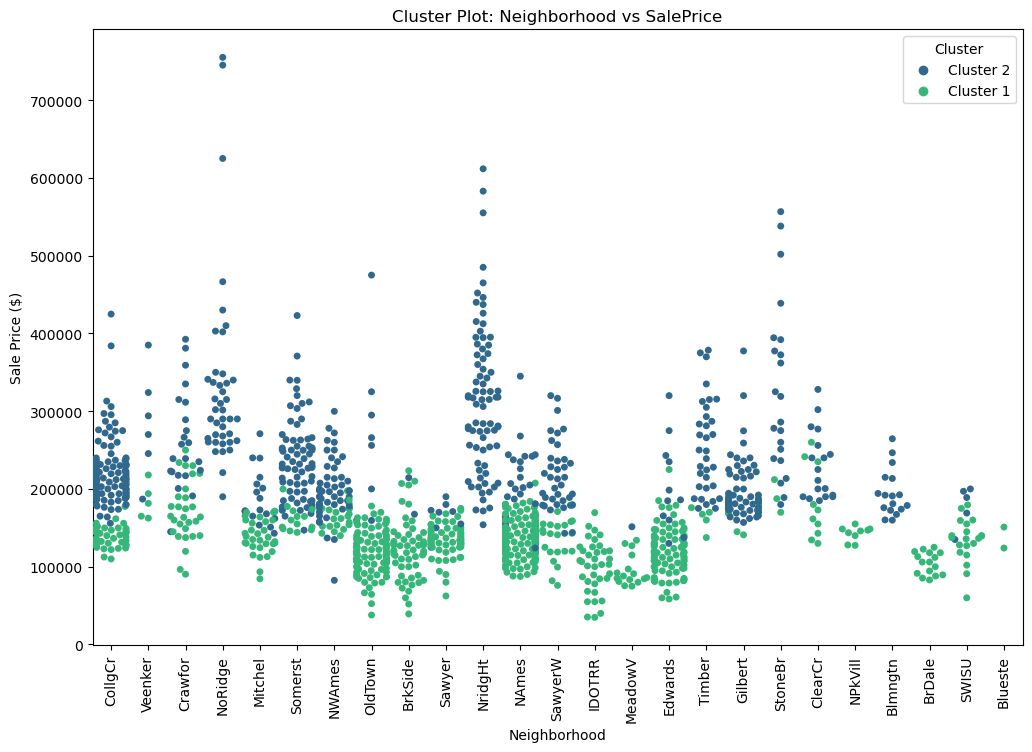

In [47]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Neighborhood', y='SalePrice', hue='Cluster', data=df, palette='viridis')
plt.title('Cluster Plot: Neighborhood vs SalePrice')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price ($)')
plt.xticks(rotation=90)
plt.legend(title='Cluster')
plt.show()
